In [1]:
# Libraries to load
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# data visualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('max_columns', None)
import pandas_profiling

# SMOTE package to address imbalanced classes 
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(123)

# Plots and Deeper EDA (Training Data Only)

In [2]:
train = pd.read_csv('./data/train_df.csv')

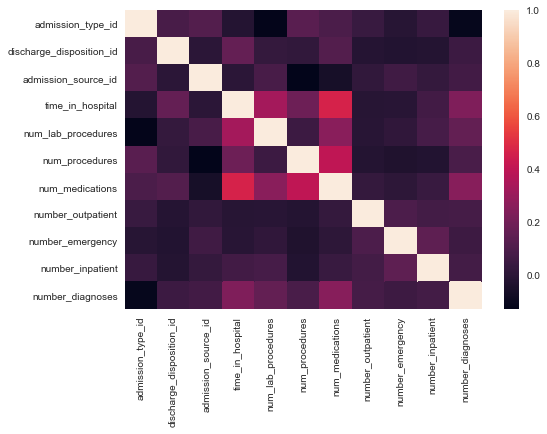

In [4]:
# Looking at correlation - keep an eye out for time_in_hospital vs num_medications
corr = train.corr()
sns.heatmap(corr)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

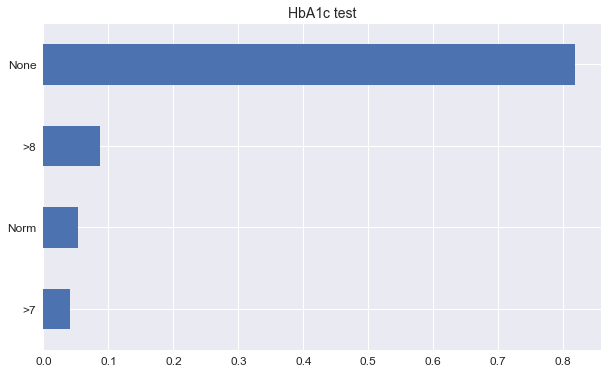

In [5]:
# HbA1c plot
plt.figure(figsize=(10,6))
a1cr_plot = train.A1Cresult.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('HbA1c test',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

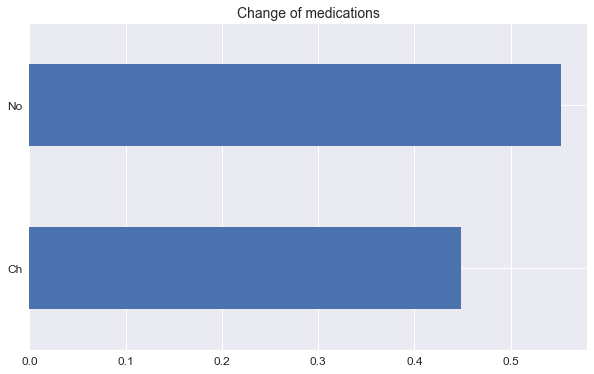

In [6]:
# Med change plot
plt.figure(figsize=(10,6))
change_plot = train.change.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Change of medications',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

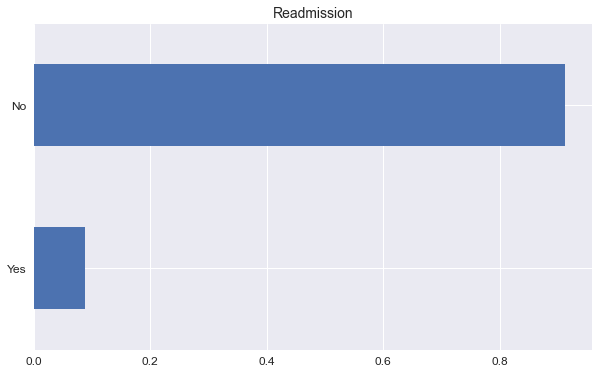

In [7]:
# Readmission plot
plt.figure(figsize=(10,6))
readmission_plot = train.readmitted.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Readmission',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

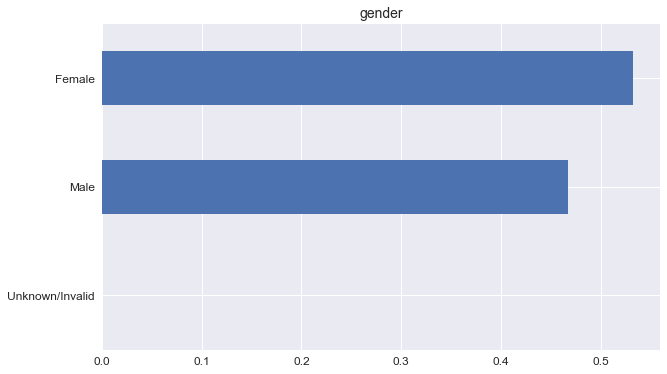

In [8]:
# Gender plot
plt.figure(figsize=(10,6))
gender_plot = train.gender.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('gender',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

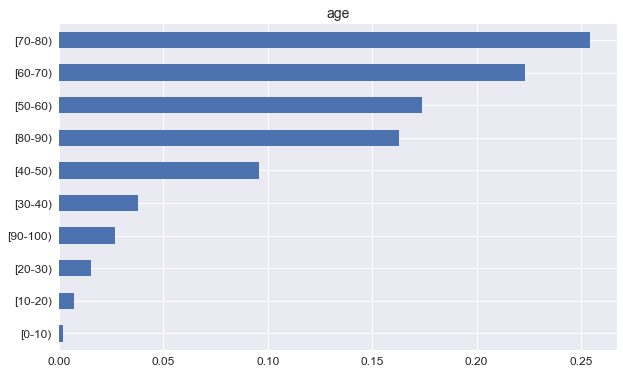

In [9]:
# age plot
plt.figure(figsize=(10,6))
age_plot = train.age.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('age',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

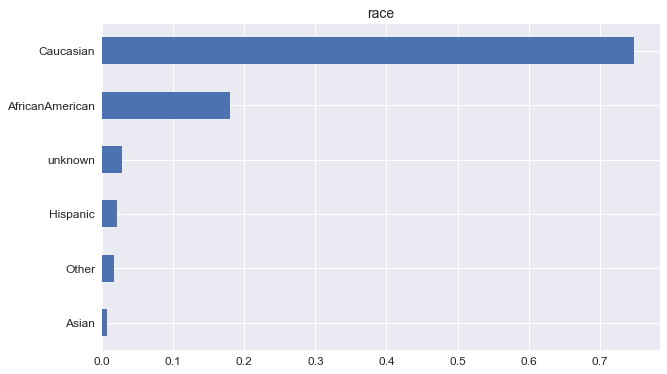

In [10]:
# Race plot
plt.figure(figsize=(10,6))
race_plot = train.race.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('race',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [11]:
train['max_glu_serum'].replace('>300','>200',inplace=True)
train['A1Cresult'].replace('>8','>7',inplace=True)

In [12]:
#Readmission Table 1: Max Glucouse Serum
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count()

race
max_glu_serum readmitted       
>200          No           1242
              Yes           151
None          No          49714
              Yes          4727
Norm          No           1254
              Yes           126

In [13]:
#Percentage
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count().apply(lambda x: x/train.race.count())

race
max_glu_serum readmitted          
>200          No          0.021708
              Yes         0.002639
None          No          0.868913
              Yes         0.082620
Norm          No          0.021918
              Yes         0.002202

## A1c 

In [14]:
#Readmission Table 2: A1C Result 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count()

race
A1Cresult readmitted       
>7        No           6744
          Yes           602
None      No          42649
          Yes          4148
Norm      No           2817
          Yes           254

In [15]:
#Percentage 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count().apply(lambda x: x/train.race.count())

race
A1Cresult readmitted          
>7        No          0.117873
          Yes         0.010522
None      No          0.745429
          Yes         0.072500
Norm      No          0.049236
          Yes         0.004439

## Gender


In [16]:
#Readmission Table 3: Gender
train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count()

race
gender          readmitted       
Female          No          27771
                Yes          2696
Male            No          24436
                Yes          2308
Unknown/Invalid No              3

In [17]:
#Percentage 
train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count().apply(lambda x: x/train.race.count())

race
gender          readmitted          
Female          No          0.485388
                Yes         0.047121
Male            No          0.427098
                Yes         0.040340
Unknown/Invalid No          0.000052

## Age


In [18]:
#Readmission Table 4: Age
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count()

race
age      readmitted       
[0-10)   No            119
         Yes             3
[10-20)  No            408
         Yes            20
[20-30)  No            816
         Yes            70
[30-40)  No           2016
         Yes           152
[40-50)  No           5097
         Yes           400
[50-60)  No           9231
         Yes           705
[60-70)  No          11640
         Yes          1133
[70-80)  No          13121
         Yes          1431
[80-90)  No           8357
         Yes           961
[90-100) No           1405
         Yes           129

In [19]:
#Percentage
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count().apply(lambda x: x/train.race.count())

race
age      readmitted          
[0-10)   No          0.002080
         Yes         0.000052
[10-20)  No          0.007131
         Yes         0.000350
[20-30)  No          0.014262
         Yes         0.001223
[30-40)  No          0.035236
         Yes         0.002657
[40-50)  No          0.089087
         Yes         0.006991
[50-60)  No          0.161342
         Yes         0.012322
[60-70)  No          0.203447
         Yes         0.019803
[70-80)  No          0.229332
         Yes         0.025011
[80-90)  No          0.146066
         Yes         0.016797
[90-100) No          0.024557
         Yes         0.002255

## Race

In [20]:
#Readmission Table 5: Race
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count()

gender
race            readmitted        
AfricanAmerican No            9454
                Yes            866
Asian           No             364
                Yes             32
Caucasian       No           38935
                Yes           3837
Hispanic        No            1115
                Yes             94
Other           No             886
                Yes             62
unknown         No            1456
                Yes            113

In [21]:
#Percentage
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count().apply(lambda x: x/train.gender.count())

gender
race            readmitted          
AfricanAmerican No          0.165239
                Yes         0.015136
Asian           No          0.006362
                Yes         0.000559
Caucasian       No          0.680515
                Yes         0.067064
Hispanic        No          0.019488
                Yes         0.001643
Other           No          0.015486
                Yes         0.001084
unknown         No          0.025448
                Yes         0.001975

In [22]:
#train.profile_report()